# An introduction to pytorch

## Tensor

A tensor is a multidimensional array optimized to work with GPU (i.e., it is much more efficient than NumPy arrays). We can use it to represent image sets, multi-channel images, kernels weights, etc. -- e.g., let's create a tensor from an image.

In [17]:
#import package to manipulate and display images
from skimage import io
import matplotlib.pyplot as plt

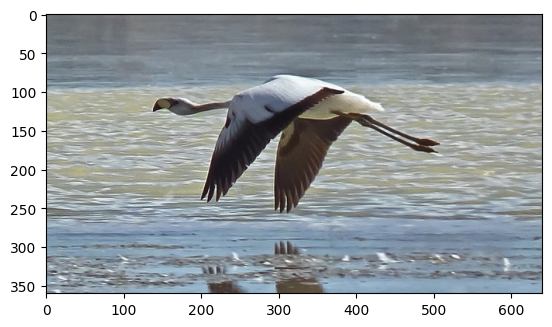

In [18]:
#load image and display it
input_image = io.imread("./images/bird.png")
plt.imshow(input_image)
plt.show()

So far, our image is still a multidimensional NumPy array.

In [19]:
#image size: number of rows (y dim., height), number of ncolumns (x dim., width), number of channels (depth)
print(f"The image shape is {input_image.shape} and the type is {type(input_image)}.")

The image shape is (360, 640, 3) and the type is <class 'numpy.ndarray'>.


However, this image can be easily transformed into a pytorch tensor.

In [20]:
#import pytorch
import torch

tmp_image = torch.tensor(input_image)
print(f"Now, the image shape is {tmp_image.shape} and the type is {type(tmp_image)}.")

Now, the image shape is torch.Size([360, 640, 3]) and the type is <class 'torch.Tensor'>.


And, as expected, the tensor is also stored as a n dimensional array.

In [21]:
print(tmp_image)

tensor([[[110, 115, 119],
         [110, 115, 119],
         [111, 116, 120],
         ...,
         [115, 118, 125],
         [114, 117, 124],
         [116, 119, 126]],

        [[109, 114, 118],
         [109, 114, 118],
         [109, 114, 118],
         ...,
         [111, 114, 121],
         [113, 116, 123],
         [115, 118, 125]],

        [[111, 116, 120],
         [111, 116, 120],
         [112, 117, 121],
         ...,
         [108, 111, 118],
         [110, 113, 120],
         [111, 114, 121]],

        ...,

        [[133, 149, 162],
         [127, 143, 156],
         [138, 152, 165],
         ...,
         [145, 172, 191],
         [148, 175, 194],
         [139, 166, 185]],

        [[119, 133, 146],
         [124, 138, 151],
         [114, 126, 140],
         ...,
         [145, 172, 191],
         [152, 179, 198],
         [142, 169, 188]],

        [[149, 163, 176],
         [150, 164, 177],
         [149, 161, 175],
         ...,
         [143, 170, 189],
        

Commonly, though, to properly use an image in pytorch, you must place the number of channels before the numbers of rows and columns. That is, image tensors must be stored as (nchannels, nrows, ncols) = (nchannels, height, width) instead of (height, width, nchannels) as we have seem in numpy.

In [22]:
image = tmp_image.permute(2,0,1) # same as tmp_image.transpose(1, 2).transpose(0, 1) 
print(f"The new shape of the image, after permuting the axis, is {image.shape}.")

The new shape of the image, after permuting the axis, is torch.Size([3, 360, 640]).


We can also represent a kernel
$K = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$ as a pytorch tensor.

In [23]:
sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]).float()
print(sobel_x.shape)
print(sobel_x)

torch.Size([3, 3])
tensor([[-1.,  0.,  1.],
        [-2.,  0.,  2.],
        [-1.,  0.,  1.]])


But the similarities with numpy arrays don't stop there, tensors can also be initialized in multiple ways.

In [24]:
x = torch.zeros((3,3))
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [25]:
x = torch.ones((3,3))
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [26]:
x = torch.randn((3,3)) # random numbers with normal distribution with mean 0 and stdev 1
y = torch.rand((3,3))  # random numbers with uniform distribution in [0,1]
print(x)
print(y)

tensor([[ 0.4906, -0.4967,  0.4074],
        [-0.3369,  0.0221,  2.1293],
        [-0.4697, -0.5576,  0.0526]])
tensor([[0.5309, 0.6243, 0.7868],
        [0.5591, 0.0228, 0.6734],
        [0.9471, 0.3036, 0.0842]])


In [27]:
y = torch.randint(low=100, high=200, size=(5,4)) # random integer numbers in [100,199]
print(y)

tensor([[172, 197, 159, 146],
        [172, 192, 191, 131],
        [157, 166, 129, 117],
        [134, 180, 145, 184],
        [159, 175, 177, 115]])


We can also use arithmetic operations.

In [28]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)
y = x * 10
print(y)
z = x + 10 # x.add(10)
print(z)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[10, 20, 30],
        [40, 50, 60]])
tensor([[11, 12, 13],
        [14, 15, 16]])


And reshape the array.

In [29]:
# reshaping
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x)
print(x.shape)
x = x.reshape((3,2)) # Note that, this is NOT the same as x.transpose(0,1)
print(x.shape)
print(x)
x = x.reshape(-1)
print(x.shape)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])
torch.Size([3, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([6])
tensor([1, 2, 3, 4, 5, 6])


Squeeze and unsqueeze it.

In [30]:
# squeezing and unsqueezing

x = torch.randn((4,4))
print("A tensor of size {} x {}".format(x.shape[0],x.shape[1]))
print(x)

y = x.unsqueeze(0) # It adds a new axis 0 of size one. It could also be axis 1 or 2. 
print("By adding axis=0, we have a tensor of size {} x {} x {}".format(y.shape[0],y.shape[1],y.shape[2]))
print(y)

x = y.squeeze(0) # It removes axis 0 if its size is one
print("By removing axis=0, we have a tensor of size {} x {}".format(x.shape[0],x.shape[1]))
print(x)

x = torch.randn((4,1,4,1,1))
print("A tensor with size {} x {} x {} x {} x {}".format(x.shape[0],x.shape[1],x.shape[2],x.shape[3],x.shape[4]))
print(x)

y = x.squeeze(3) # It removes axis 3 if its size is one
print("By removing axis=3, we have a tensor of size {} x {} x {} x {}".format(y.shape[0],y.shape[1],y.shape[2],y.shape[3]))
print(y)

y = x.squeeze() # It removes all axes of size one
print("By removing all axes of size one, we have a tensor of size {} x {}".format(y.shape[0],y.shape[1]))
print(y)


A tensor of size 4 x 4
tensor([[ 0.7432,  1.2848,  1.6162, -0.2208],
        [-0.5955, -0.1588,  0.0412, -1.1812],
        [-0.3902, -2.5317,  0.8091,  1.6910],
        [ 0.5244, -0.4565,  0.2367,  0.9623]])
By adding axis=0, we have a tensor of size 1 x 4 x 4
tensor([[[ 0.7432,  1.2848,  1.6162, -0.2208],
         [-0.5955, -0.1588,  0.0412, -1.1812],
         [-0.3902, -2.5317,  0.8091,  1.6910],
         [ 0.5244, -0.4565,  0.2367,  0.9623]]])
By removing axis=0, we have a tensor of size 4 x 4
tensor([[ 0.7432,  1.2848,  1.6162, -0.2208],
        [-0.5955, -0.1588,  0.0412, -1.1812],
        [-0.3902, -2.5317,  0.8091,  1.6910],
        [ 0.5244, -0.4565,  0.2367,  0.9623]])
A tensor with size 4 x 1 x 4 x 1 x 1
tensor([[[[[-1.1075]],

          [[-0.2315]],

          [[-0.0071]],

          [[ 1.3994]]]],



        [[[[-0.5093]],

          [[ 0.4960]],

          [[-0.2062]],

          [[-2.0328]]]],



        [[[[ 1.0435]],

          [[ 0.3324]],

          [[ 0.1251]],

    

Matrix operations - such as inner product, matrix multiplication and concatenation - are also possible.

In [31]:
x = torch.tensor([1, 1, 0])
y = torch.tensor([1, 0, 1])
print("Inner product:")
print("<{},{}>={}".format(x,y,x.dot(y)))
print()

print("Matrix multiplication:")
x = torch.tensor([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
y = torch.tensor([1, 1, 1])
print(x, "x", y,"=",y.matmul(x)) # The same as y@x
print()

print("Concatenation:")
x = torch.arange(9)
print("x = ",x)
y = x.reshape((3,3))
print("y = ", y, "after reshaping x as a 3 x 3 matrix")
z = torch.cat([y,y], axis=0)
print("z = ", z, "after concatenating y with y along axis 0")
z = torch.cat([y,y], axis=1)
print("z = ", z, "after concatenating y with y along axis 1")

Inner product:
<tensor([1, 1, 0]),tensor([1, 0, 1])>=1

Matrix multiplication:
tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]) x tensor([1, 1, 1]) = tensor([3, 6, 9])

Concatenation:
x =  tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])
y =  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) after reshaping x as a 3 x 3 matrix
z =  tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]]) after concatenating y with y along axis 0
z =  tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5],
        [6, 7, 8, 6, 7, 8]]) after concatenating y with y along axis 1


## Gradient

A very important feature of tensors is that they come with a built-in functionality to calculate gradients.

In [32]:
x = torch.tensor([[2., -1.], [1., 1.]], requires_grad=True)
print("x = ", x)

x =  tensor([[ 2., -1.],
        [ 1.,  1.]], requires_grad=True)


Suppose we calculate $ y = \sum_{i=1}^{4} x^2_i $ whose derivative $\frac{\partial y}{\partial x} = 2 \sum_{i=1}^{4} x_i$. The gradient can be calculated by calling `y.backward()` followed by `x.grad`.

In [33]:
y = x.pow(2).sum()
print("y = x.pow(2).sum() =", y)
y.backward()
print("x.grad = ", x.grad)
print("z = x.grad.sum() = ", x.grad.sum())

y = x.pow(2).sum() = tensor(7., grad_fn=<SumBackward0>)
x.grad =  tensor([[ 4., -2.],
        [ 2.,  2.]])
z = x.grad.sum() =  tensor(6.)


## Backpropagation

A simple example of neural network with backpropagation using tensors is:

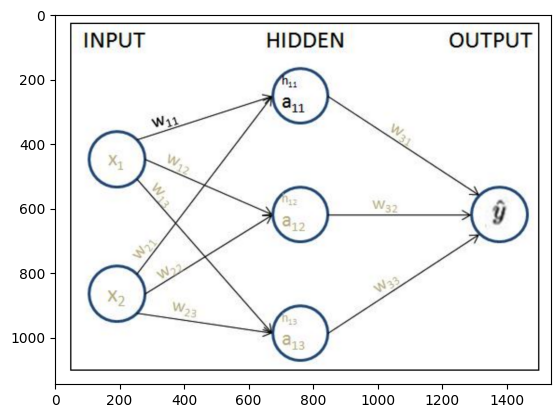

In [34]:
import numpy as np
import matplotlib.image as mpimg

img = mpimg.imread('./figs/Simple_NN.png')
imgplot = plt.imshow(img)
plt.show()
x = np.array([[1,1]]) # input of the network
y = np.array([[0]])   # desired output
x, y = [torch.tensor(i).float() for i in [x,y]]

We can define the feed forward and update weights steps using pytorch auto gradient.

In [35]:
def feed_forward(inputs, outputs, weights):
    pre_hidden = torch.matmul(inputs,weights[0])+ weights[1] # hidden layer: inner product with weight vectors + bias
    hidden = 1/(1+torch.exp(-pre_hidden)) # sigmoid activation function
    out = torch.matmul(hidden, weights[2]) + weights[3] # last layer: inner product with the weight vector + bias
    mean_squared_error = torch.mean(torch.square(out - outputs)) # loss: mean square error
    return mean_squared_error

In [36]:
def update_weights(inputs, outputs, weights, lr):
    '''Updates the weights and bias using auto gradient'''        
    original_loss    = feed_forward(inputs, outputs, weights) # forward pass
    original_loss.backward() # compute gradients
    updated_weights  = [w - lr*w.grad for w in weights] # update weights based on the computed gradients
    updated_weights  = [torch.clone(i).detach().requires_grad_(True) for i in updated_weights]  # rebuild the weight tensor list
    return updated_weights, original_loss

The weight initialization might be random.

In [37]:
# W stores the transposed weight matrices (.T) of the hidden and decision layers as well as 
# the three biases of the hidden layer and one bias of the decision layer. 
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

W = [torch.tensor(i, requires_grad=True) for i in W]

And training the network would be simple:

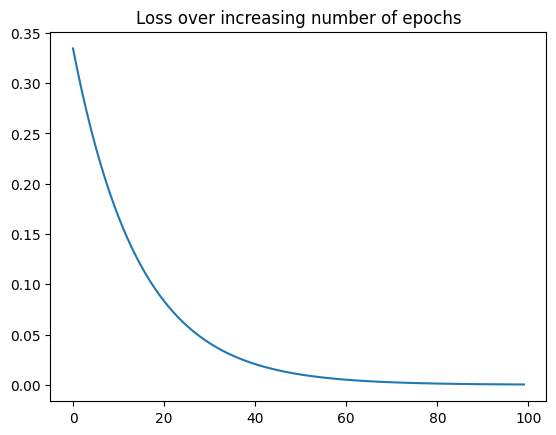

In [38]:
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss.detach().cpu())  
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.show()

The final weights and bias of all layers used by the NN would, then, be:

In [39]:
print("W = ", W)

W =  [tensor([[ 0.0142, -0.5908, -0.2755],
        [ 0.3988, -0.5292,  0.1864]], requires_grad=True), tensor([ 0.0055,  0.5519, -0.0660], requires_grad=True), tensor([[ 0.3475],
        [-0.0553],
        [ 0.0376]], requires_grad=True), tensor([-0.2244], requires_grad=True)]


Finally, we can test the the NN:

In [40]:
pre_hidden = torch.matmul(x,W[0])+ W[1]
hidden     = 1/(1+torch.exp(-pre_hidden))
out        = torch.matmul(hidden, W[2]) + W[3] 

In [41]:
print(out)

tensor([[-0.0174]], grad_fn=<AddBackward0>)
